# AFAME TECHNOLOGIES
## DATA ANALYST INTERNSHIP
### Name : Manoj Kanna.E
#### Project - 1 : Sales Data Analysis 

## Importing Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load & reading the dataset
file_path = ("/kaggle/input/sales-data/Sales Data.xlsx")
data = pd.read_excel(file_path)

In [3]:
# Printing top 5 rows from the dataset  
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
# Printing bottom 5 rows from the dataset  
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


## Data pre-processing 

In [5]:
# Displaying the count of rows & columns
data.shape

(51290, 24)

In [6]:
# Listing all columns name data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
# Printing the columns name
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
# Checking for Missing values
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
# Remove and verify the missing values
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [11]:
# Finding the duplicate values
data.duplicated().sum()

0

## Descriptive Analysis

In [12]:
# Basic Statistical Implementation
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,36293.5,31297.0,33795.25,36293.5,38791.75,41290.0,2885.163629
Order Date,9994,2013-04-30 19:20:02.401441024,2011-01-04 00:00:00,2012-05-23 00:00:00,2013-06-27 00:00:00,2014-05-15 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,9994,2013-05-04 18:20:49.229537792,2011-01-08 00:00:00,2012-05-27 00:00:00,2013-06-30 00:00:00,2014-05-19 00:00:00,2015-01-06 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
Shipping Cost,9994.0,23.831678,0.01,1.49,5.1,19.985,933.57,58.962848


### Region-Wise Sales and Profit Performance Report

In [13]:
# Calculate total sales and profit across Region
performance_by_region = data.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
print(performance_by_region)

    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


### Top 10 Products with Highest Sales Revenue

In [14]:
# Identify Top 10 Best-selling products 
top_selling_products = data.groupby('Product Name').agg({
    'Sales': 'sum'
}).reset_index()
top_selling_products = top_selling_products.sort_values(by='Sales', ascending=False)
print(top_selling_products.head(10))

                                          Product Name      Sales
403              Canon imageCLASS 2200 Advanced Copier  61599.824
648  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
443  Cisco TelePresence System EX90 Videoconferenci...  22638.480
784       HON 5400 Series Task Chairs for Big and Tall  21870.576
684         GBC DocuBind TL300 Electric Binding System  19823.479
686   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
803               Hewlett Packard LaserJet 3310 Copier  18839.686
785  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
681          GBC DocuBind P400 Electric Binding System  17965.068
811        High Speed Automatic Electric Letter Opener  17030.312


## Data Visualization

### Monthly Sales Trends Analysis for 2014

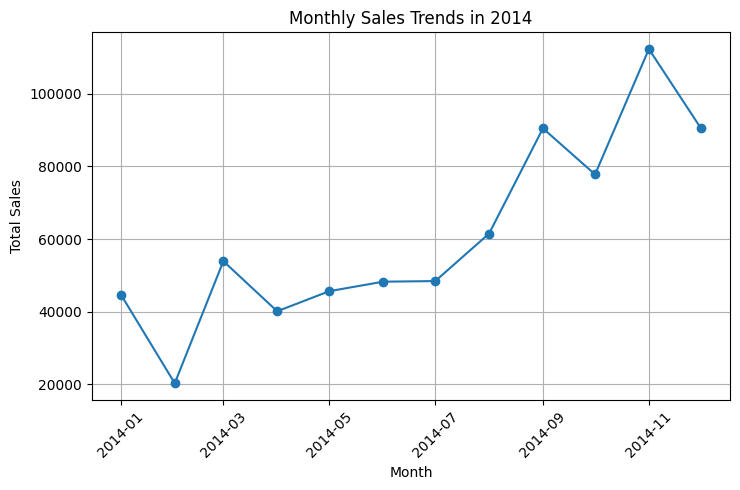

In [15]:
# Plotting the line chart of total sales for each month in 2014 
data['Order Date'] = pd.to_datetime(data['Order Date'])
data_2014 = data[data['Order Date'].dt.year == 2014]
monthly_sales_2014 = data_2014.groupby(data_2014['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'
}).reset_index()
monthly_sales_2014['Order Date'] = monthly_sales_2014['Order Date'].dt.to_timestamp()

#plot the chart
plt.figure(figsize=(7.5, 5))
plt.plot(monthly_sales_2014['Order Date'], monthly_sales_2014['Sales'], marker='o')
plt.title('Monthly Sales Trends in 2014')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Profit Distribution Across Different Product Categories

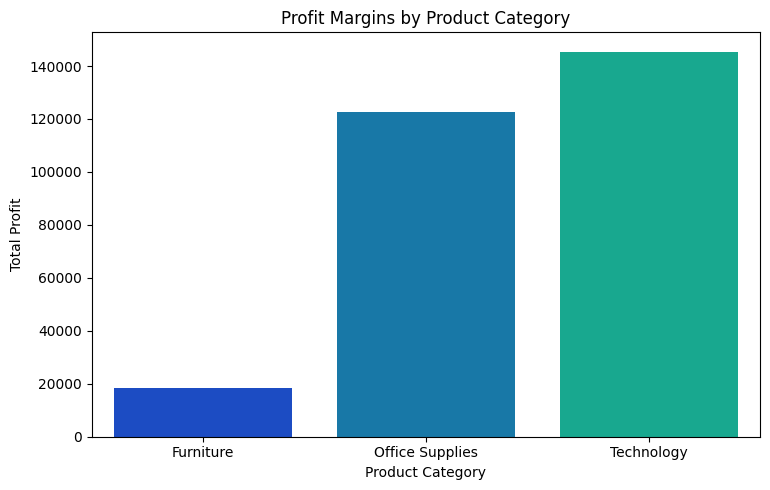

In [16]:
# Creating a bar chart showing the total profit for each category.
profit_by_category = data.groupby('Category').agg({'Profit': 'sum'}).reset_index()
plt.figure(figsize=(7.8, 5))
sns.barplot(data=profit_by_category, x='Category', y='Profit', palette='winter')
plt.title('Profit Margins by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

### Analying Total Sales by Customer Segments

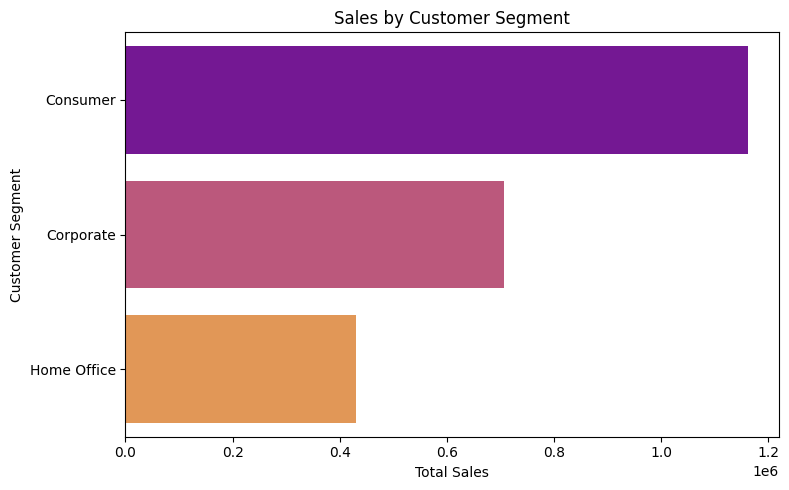

In [17]:
# the horizontal bar plot for calculate total sales for each segment
sales_by_segment = data.groupby('Segment').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_segment, x='Sales', y='Segment', palette='plasma')
plt.title('Sales by Customer Segment')
plt.xlabel('Total Sales')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

### Sales Proportions Across Different Shipping Mode 

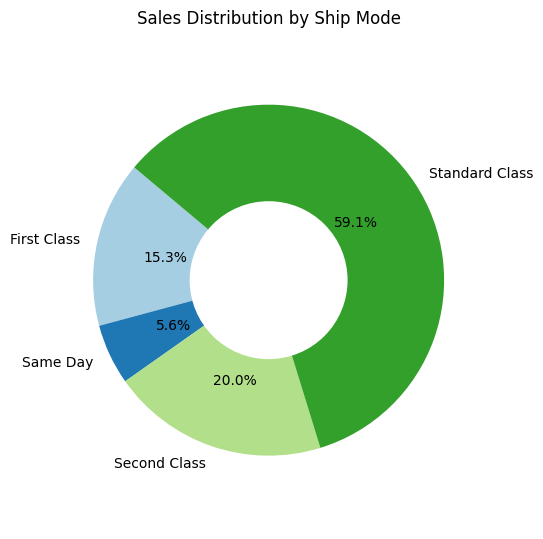

In [18]:
# Creating the donut chart for 'Ship Mode' and calculating the total sales for each mode.
sales_by_ship_mode = data.groupby('Ship Mode').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(5.5, 5.5))
plt.pie(sales_by_ship_mode['Sales'], labels=sales_by_ship_mode['Ship Mode'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sales Distribution by Ship Mode')
plt.axis('equal')  
plt.tight_layout()
plt.show()

### Sales Performance Analysis for Top 10 States

<ipython-input-19-e7d663a8be67>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=top_states_data, x='State', y='Sales', jitter=True, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  da

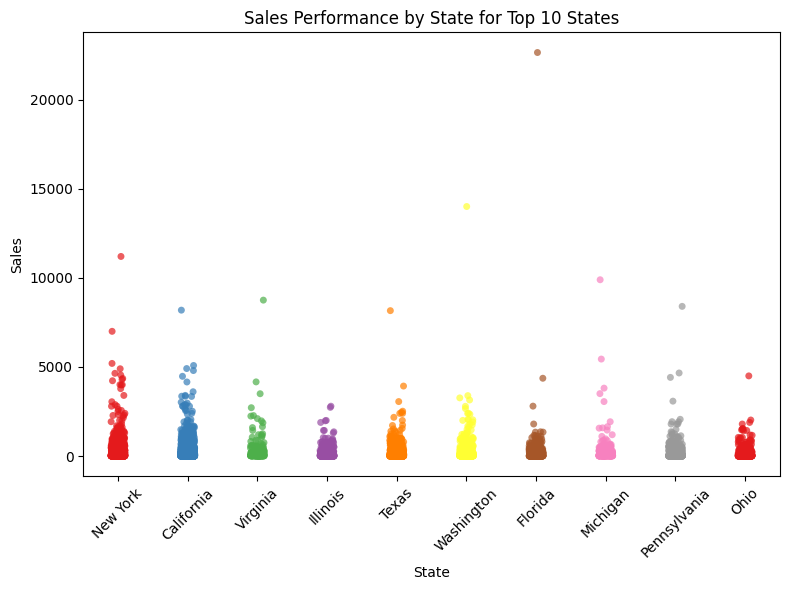

In [19]:
# Creating a strip plot to visualize sales performance for leading States.
sales_by_state = data.groupby('State').agg({'Sales': 'sum'}).reset_index()
top_states = sales_by_state.sort_values(by='Sales', ascending=False).head(10)['State']
top_states_data = data[data['State'].isin(top_states)]

# Plot the strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=top_states_data, x='State', y='Sales', jitter=True, palette='Set1', alpha=0.7)
plt.title('Sales Performance by State for Top 10 States')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis for Discount vs Profit

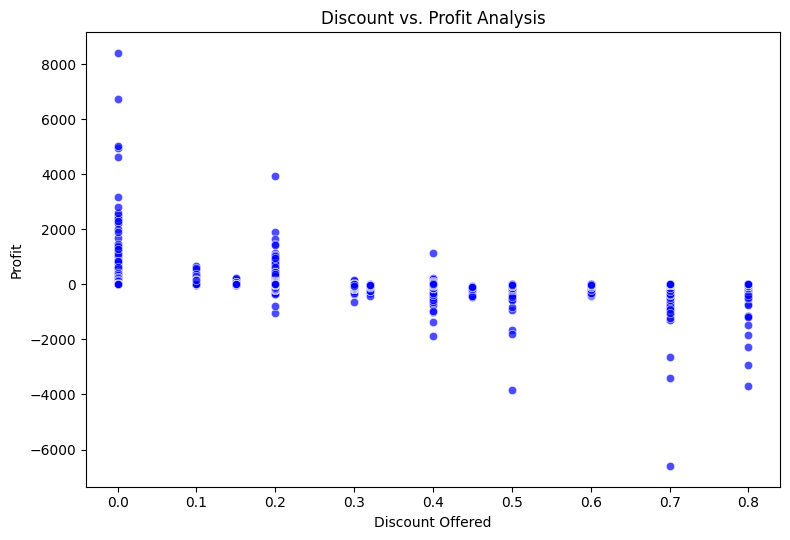

In [20]:
# Plotting the scatter plot for discount vs profit 
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=data, x='Discount', y='Profit', color='blue', alpha=0.7)
plt.title('Discount vs. Profit Analysis')
plt.xlabel('Discount Offered')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Shipping Cost and Sales by ship mode

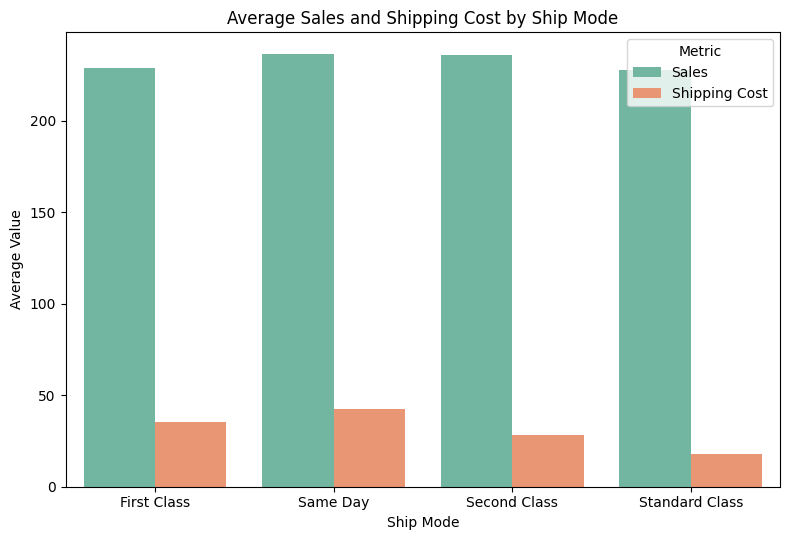

In [21]:
# Grouping the data by 'Ship Mode' and calculating the average Sales and Shipping Cost
grouped_data = data.groupby('Ship Mode').agg({'Sales': 'mean', 'Shipping Cost': 'mean'}).reset_index()

# Creating the grouped bar plot
plt.figure(figsize=(8, 5.5))
sns.barplot(data=grouped_data.melt(id_vars='Ship Mode'), x='Ship Mode', y='value', hue='variable', palette='Set2')
plt.title('Average Sales and Shipping Cost by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Understanding Customer Revenue with CLV Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


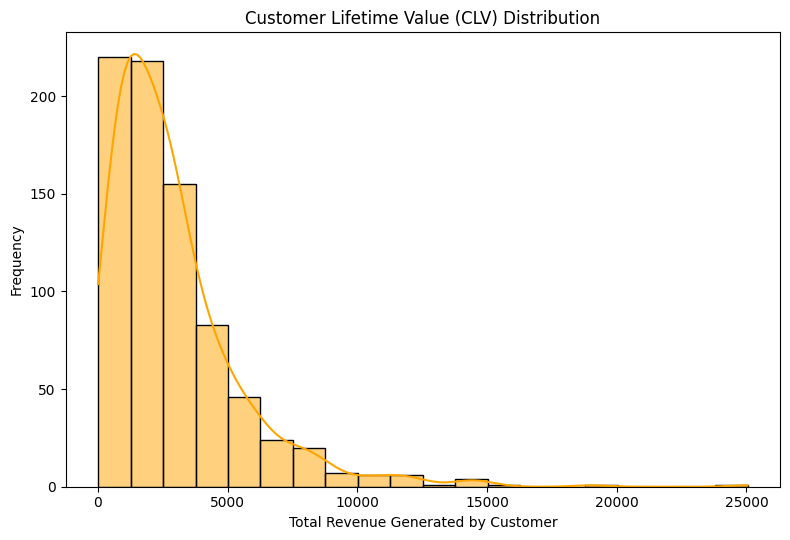

In [22]:
# Plotting the histogram for CLV distribution for total revenue generated by customer
clv = data.groupby('Customer ID')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5.5))
sns.histplot(clv['Sales'], kde=True, color='orange', bins=20)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('Total Revenue Generated by Customer')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Monthly Analysis of Order Delivery Time in 2012

<ipython-input-23-34a1b79b43a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2012['Delivery Time'] = (data_2012['Ship Date'] - data_2012['Order Date']).dt.days
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


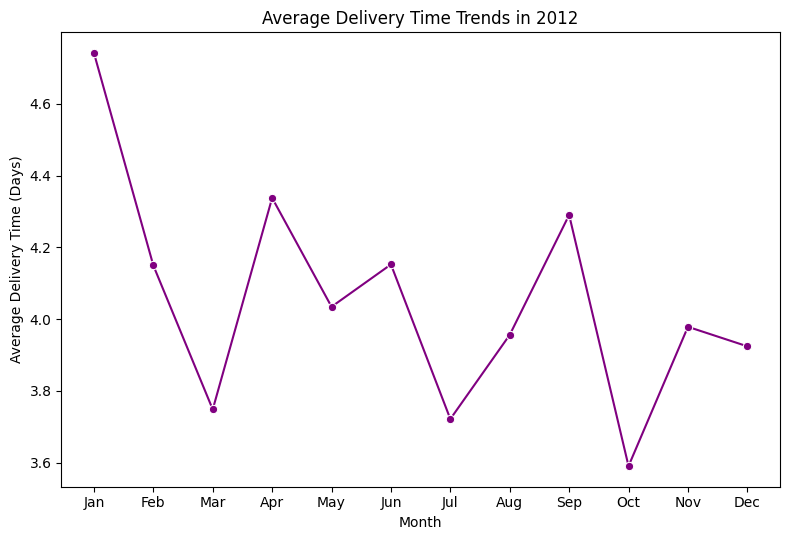

In [23]:
# Plotting the line chart by month and calculate the average delivery time
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data_2012 = data[data['Order Date'].dt.year == 2012]
data_2012['Delivery Time'] = (data_2012['Ship Date'] - data_2012['Order Date']).dt.days
monthly_delivery_time = data_2012.groupby(data_2012['Order Date'].dt.month)['Delivery Time'].mean()

# plot the chart 
plt.figure(figsize=(8, 5.5))
sns.lineplot(x=monthly_delivery_time.index, y=monthly_delivery_time.values, marker='o', color='purple')
plt.title('Average Delivery Time Trends in 2012')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

### Impact of Product Sub-Categories on Total Sales

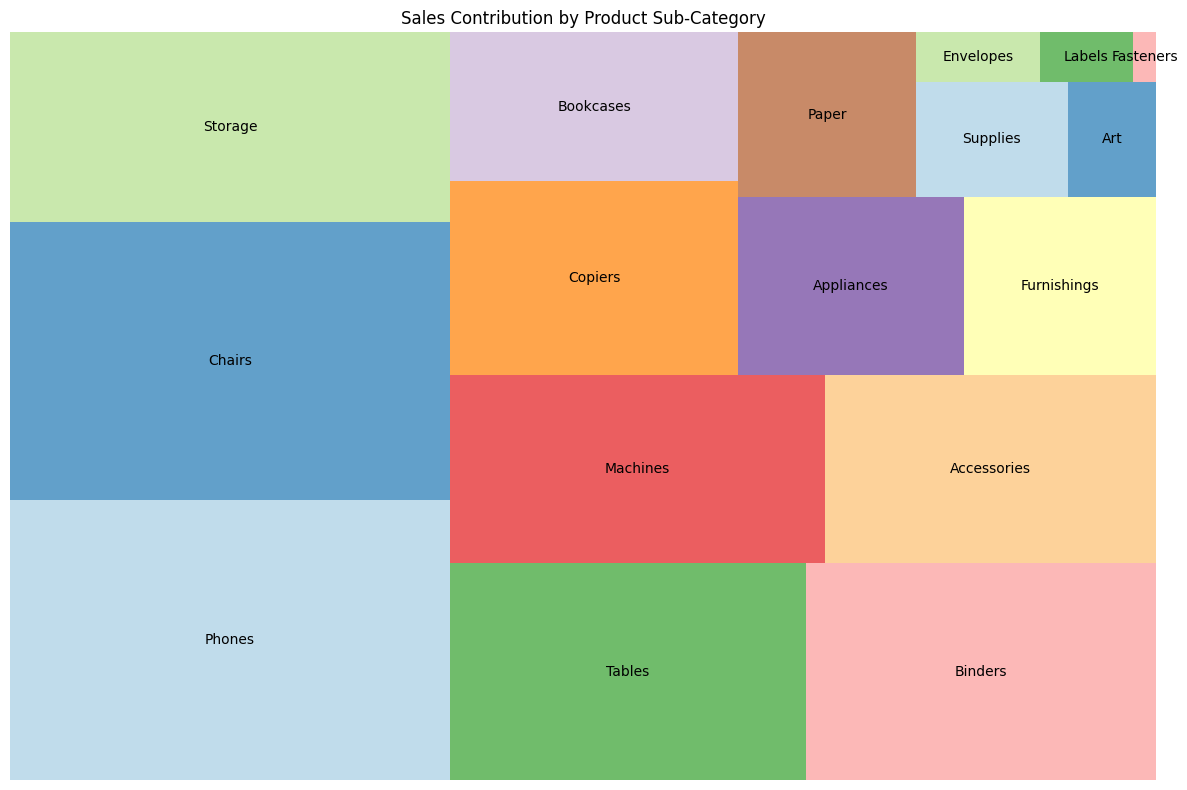

In [24]:
# Treemap visualization for Sales with product sub-category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory = sales_by_subcategory.sort_values(by='Sales', ascending=False)

# Plotting the Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sales_by_subcategory['Sales'], label=sales_by_subcategory['Sub-Category'], alpha=0.7, color=plt.cm.Paired.colors)
plt.title('Sales Contribution by Product Sub-Category')
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

### Regional and Product Category Profitability Heatmap Visualization

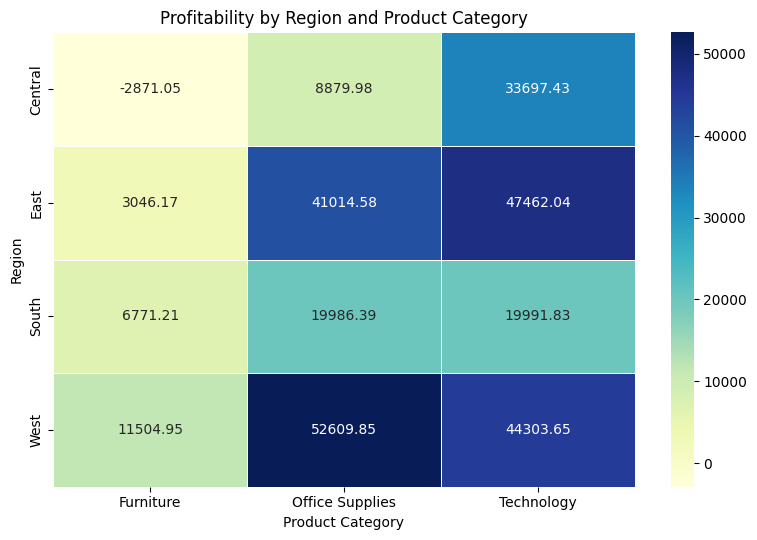

In [25]:
# Plotting the headmap for calculate total profit by Region and Category  
profitability_data = data.groupby(['Region', 'Category'])['Profit'].sum().unstack()
plt.figure(figsize=(8, 5.5))
sns.heatmap(profitability_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Profitability by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### Predicting the accuracy of actual and predicted sales by using Random Forest Regression

Mean Squared Error: 92353.93045659763
R-squared: 0.7682793627630753
       Actual Sales  Predicted Sales
19122       227.840       208.687900
8287        597.132       629.271132
27917       107.424        98.901140
165        1287.450      1767.446190
27903        56.704       107.549600
Accuracy: 66.58%


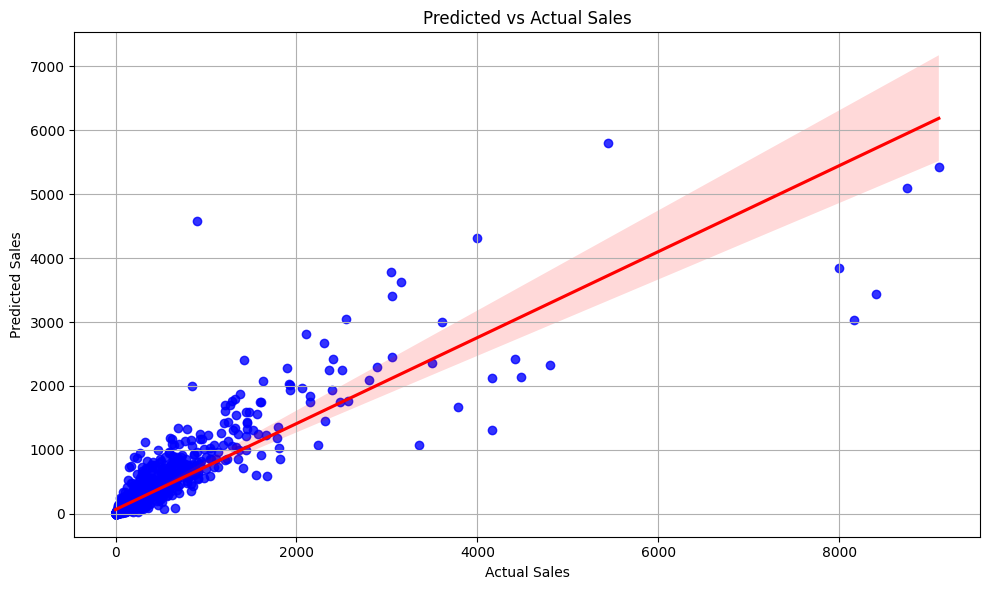

In [26]:
# Visualizing actual and predicted sales accuracy with Mean Square error value 
X = data[['Quantity', 'Discount', 'Profit', 'Shipping Cost']]  
y = data['Sales'] 

# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the Random Forest Regressor model for pretiction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(comparison_df.head()) 

# Calculating accuracy percentage of between actual and predicted sales
accuracy = 100 - (abs(y_test - y_pred).sum() / y_test.sum()) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plotting the chart 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()